# Test of the package

This notebook tests the function developed in the package, to make sure they are working as expected.

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import numpy.random as nprd
import matplotlib.pyplot as plt
import seaborn as sns
from numbers import Number

from src.function_helper import FunctionHelper, Quadratic, LogAffineFunction, LogBarrier
from src.custom_types import Line
from src.optimisation import UnconstrainedOptimizer


## Test of the Newton method

In [3]:
Q = np.array([[1, 2], [2, 4]])
p = np.array([1, -1])

test_func = Quadratic(Q=Q, p=p)

test_func_2 = test_func + 10
test_func_3 = test_func * 2

In [4]:
t_range = (-11, 10)
x0 = np.array([0, 0])
direction = np.array([1, 1])
n = 1000
offset = 1
order = 1

In [5]:
line = Line(
    x0=np.array([0, 0]),
    direction=np.array([1, 1])
)

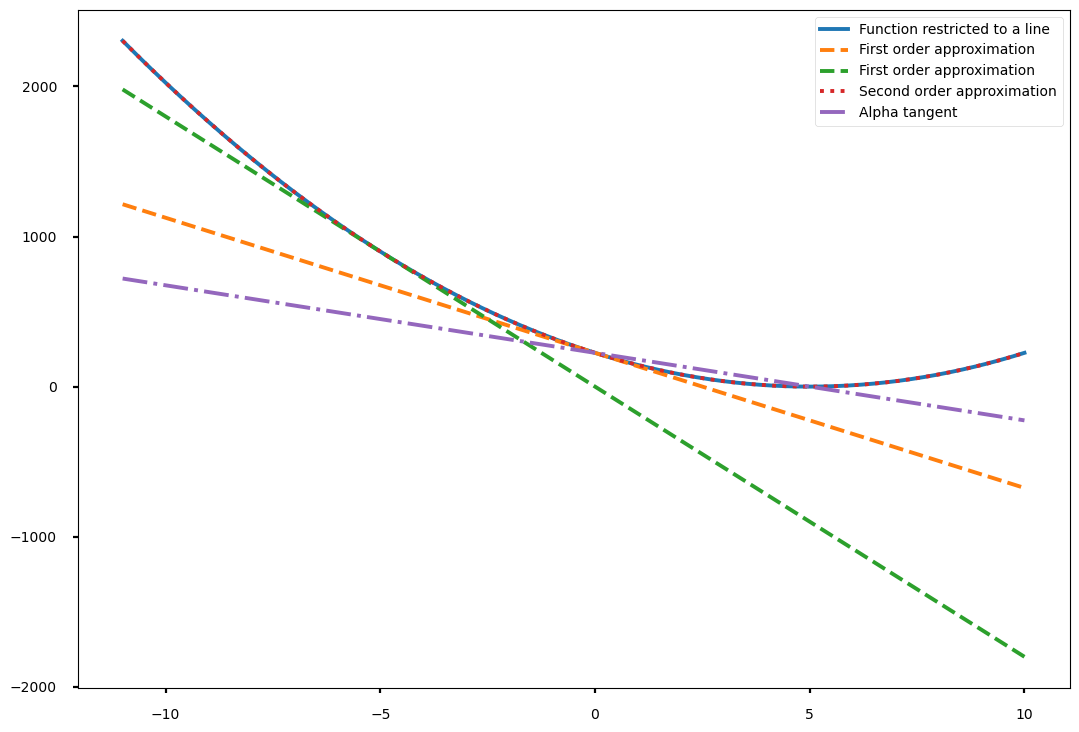

In [6]:
fig, ax = plt.subplots()

line = Line(
    x0=np.array([-5, -5]),
    direction=np.array([1, 1]),
    t_range=(-11, 10),
    n=1000
)

test_func.plot_line(line, ax=ax, label="Function restricted to a line")
test_func.plot_taylor_approximation(line, order=1, ax=ax, linestyle='--', label="First order approximation")
test_func.plot_taylor_approximation(line, order=1, offset=-5, ax=ax, linestyle='--', label="First order approximation")
test_func.plot_taylor_approximation(line, order=2, ax=ax, linestyle='dotted', label="Second order approximation")
test_func.plot_alpha_tangent(line, alpha=0.5, ax=ax, linestyle='-.', label="Alpha tangent")

In [7]:
N = 100
Q = nprd.uniform(-1, 1, size=(N, N))
p = nprd.uniform(-1, 1, size=(N))

In [8]:
ex_f = Quadratic(Q.T @ Q/10, p)
x0 = np.zeros(N)

In [9]:
pb = UnconstrainedOptimizer(ex_f, x0, method="gradient", epsilon=0)
pb.update_dir()

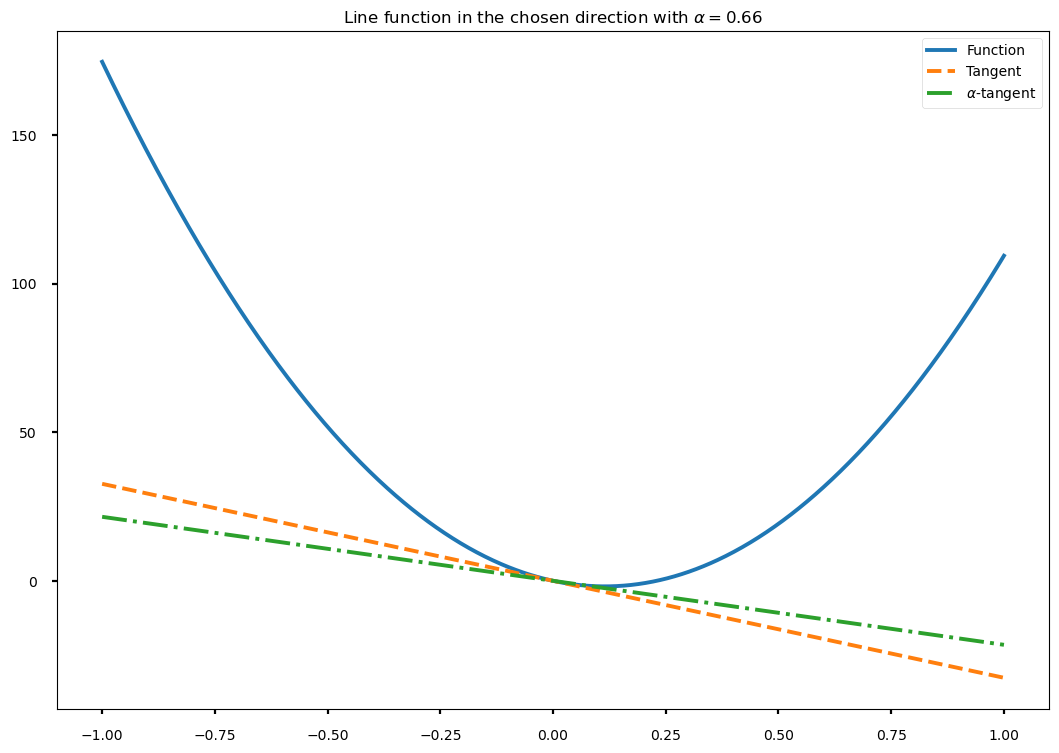

In [10]:
pb.plot_line(0.66, (-1, 1))

In [11]:
pb.optimise(1e-8, alpha=0.66, beta=0.66, verbose=False)

Unconstrained optimisation not converging.


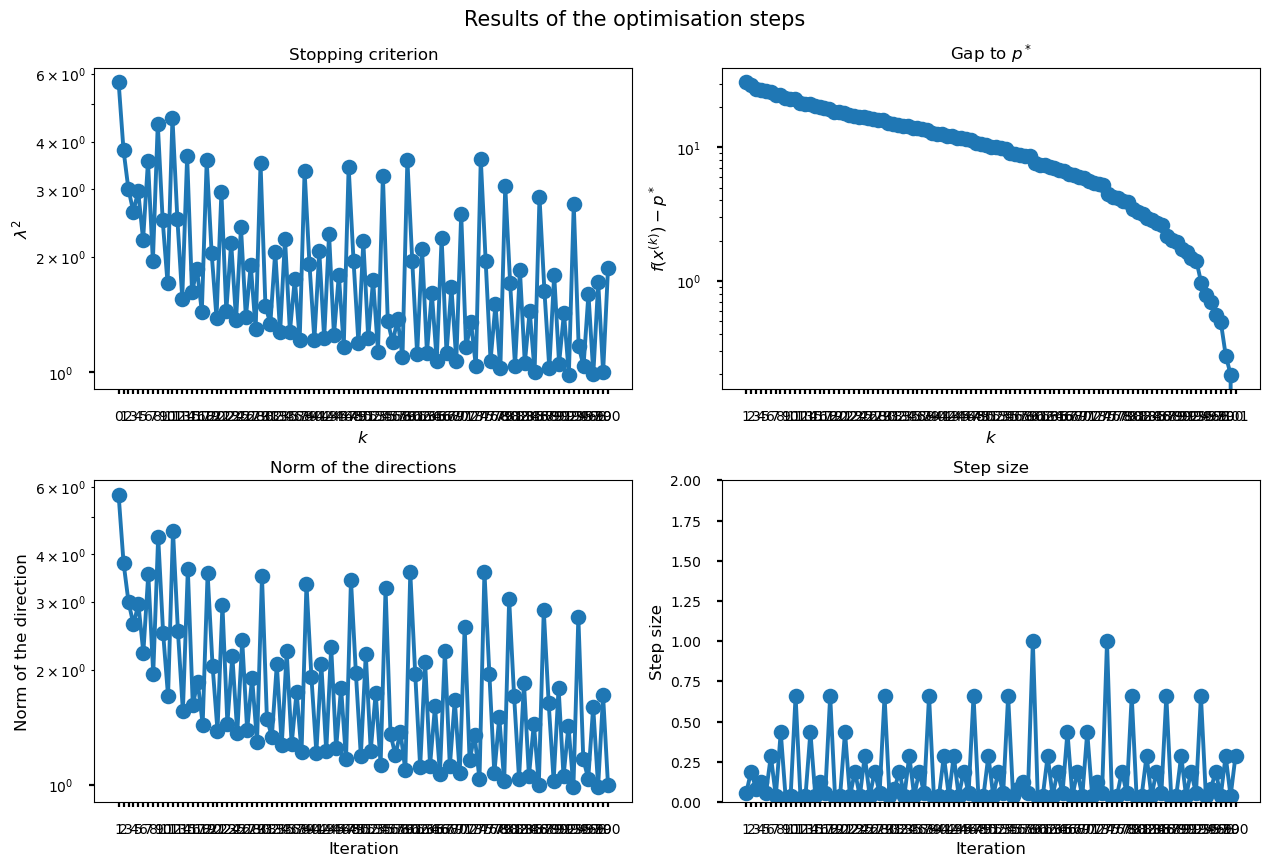

In [12]:
pbf = pb.plot_ouptuts()

## Example on a log barrier function

In [4]:
from src.function_helper import LinearFunction, LogAffineFunction
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [14]:
N = 5
I = 2

In [15]:
c = nprd.uniform(-1, 1, size=(N, N))
b = nprd.uniform(1, 5, size=(I,))
a = nprd.uniform(-1, 1, size=(I, N))
Q = nprd.uniform(-1, 1, size=(N, N))
p = nprd.uniform(-1, 1, size=(N))
x = np.zeros(N)

In [16]:
log_aff_0 = LogAffineFunction(a[0, :], b[0])
log_aff_1 = LogAffineFunction(a[1, :], b[1])
lin_f = LinearFunction(c)
quad_f = Quadratic(Q.T @ Q/100, p)
objective = quad_f + log_aff_0 + log_aff_1

In [17]:
objective(x)

-2.1066888858804207

In [18]:
pbl = UnconstrainedOptimizer(objective, x, method="newton", max_iter=100)

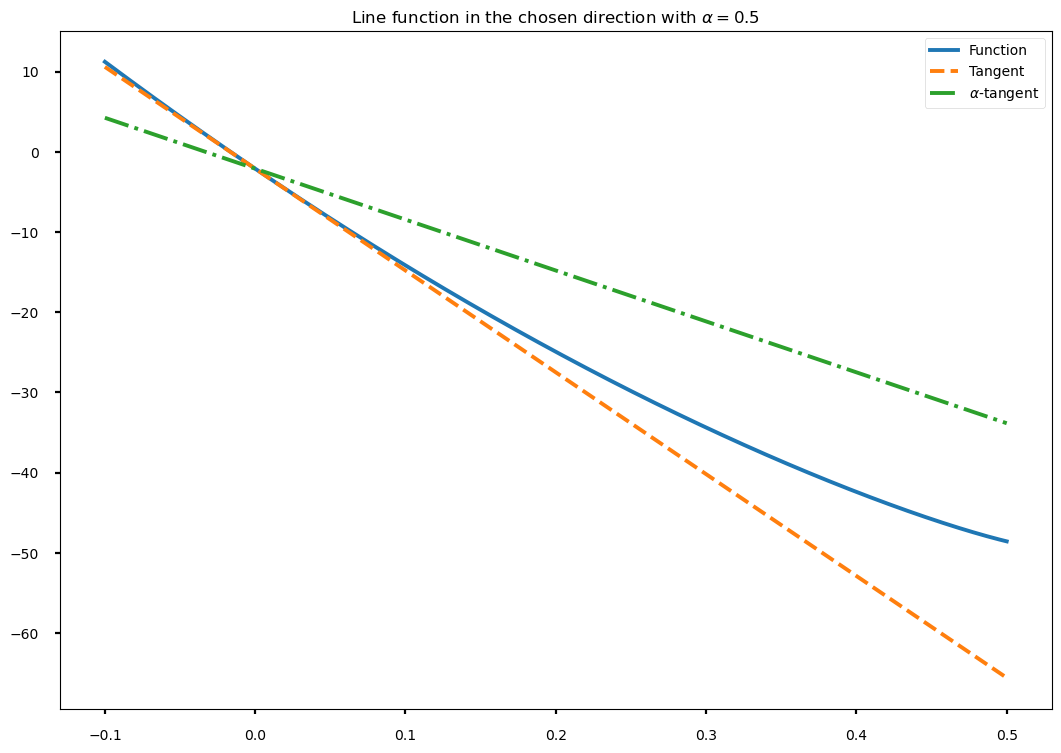

In [19]:
pbl.plot_line(0.5, t_range=(-0.1, 0.5))

In [20]:
error, alpha, beta = 1e-8, 0.4, 0.5
pbl.optimise(error, alpha, beta, verbose=True)

Step 1:
	 Criterion = 1.57e+01
	 y_1 = -49
	 y_0 - y_1 = 46
Step 2:
	 Criterion = 1.63e-01
	 y_2 = -64
	 y_1 - y_2 = 16
Step 3:
	 Criterion = 5.26e-02
	 y_3 = -65
	 y_2 - y_3 = 0.21
Step 4:
	 Criterion = 5.52e-03
	 y_4 = -65
	 y_3 - y_4 = 0.062
Step 5:
	 Criterion = 6.05e-05
	 y_5 = -65
	 y_4 - y_5 = 0.0059
Step 6:
	 Criterion = 7.28e-09
	 y_6 = -65
	 y_5 - y_6 = 6.1e-05
Last step 6:
	 Criterion = 7.28e-09
	 y_6 = -65


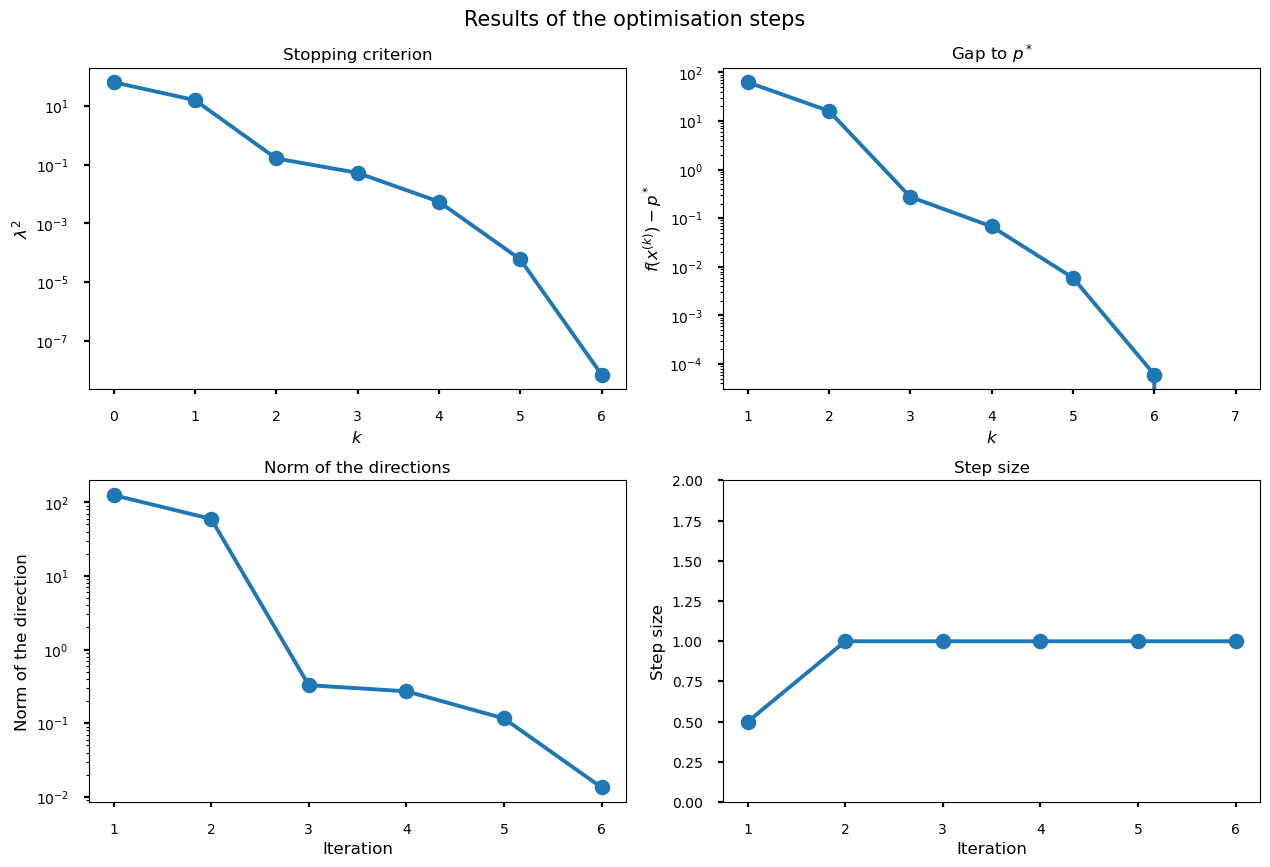

In [21]:
resfig = pbl.plot_ouptuts()

## 2D nonquadratic optimization example

\begin{equation}
f(x_1, x_2) = e^{x_1 + 3 x_2 - 0.1} + e^{x_1 - 3 x_2 - 0.1} + e^{-x_1 - 0.1}
\end{equation}

In [22]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [23]:
c1 = np.array([1, 3])
c2 = np.array([1, -3])
c3 = np.array([-1, 0])
f = lambda x: np.exp(c1 @ x - 0.1) + np.exp(c2 @ x - 0.1) + np.exp(c3 @ x - 0.1)
g = lambda x: np.array([
    np.exp(c1 @ x - 0.1) + np.exp(c2 @ x - 0.1) - np.exp(c3 @ x - 0.1),
    3*np.exp(c1 @ x - 0.1) - 3*np.exp(c2 @ x - 0.1)
])
h = lambda x: np.array([
    [
        np.exp(c1 @ x - 0.1) + np.exp(c2 @ x - 0.1) + np.exp(c3 @ x - 0.1),
        3*np.exp(c1 @ x - 0.1) - 3*np.exp(c2 @ x - 0.1),
    ],
    [
        3*np.exp(c1 @ x - 0.1) - 3*np.exp(c2 @ x - 0.1),
        9*np.exp(c1 @ x - 0.1) + 9*np.exp(c2 @ x - 0.1)
    ]
])

In [24]:
nqf = FunctionHelper(f, g, h)
x0 = np.array([-0.5, 0.5])
x1 = 0.9*np.array([1, 1])
pbnq = UnconstrainedOptimizer(func=nqf, x0=x0, method="newton")
pbnq2 = UnconstrainedOptimizer(func=nqf, x0=x0, method="gradient")
pbnq3 = UnconstrainedOptimizer(func=nqf, x0=x1, method="newton")
pbnq4 = UnconstrainedOptimizer(func=nqf, x0=x1, method="gradient")

In [25]:
pbnq.optimise(error=1e-12, alpha=0.1, beta=0.7, verbose=False)
pbnq2.optimise(error=1e-12, alpha=0.4, beta=0.7, verbose=False)
pbnq3.optimise(error=1e-12, alpha=0.1, beta=0.7, verbose=False)
pbnq4.optimise(error=1e-12, alpha=0.4, beta=0.2, verbose=False)

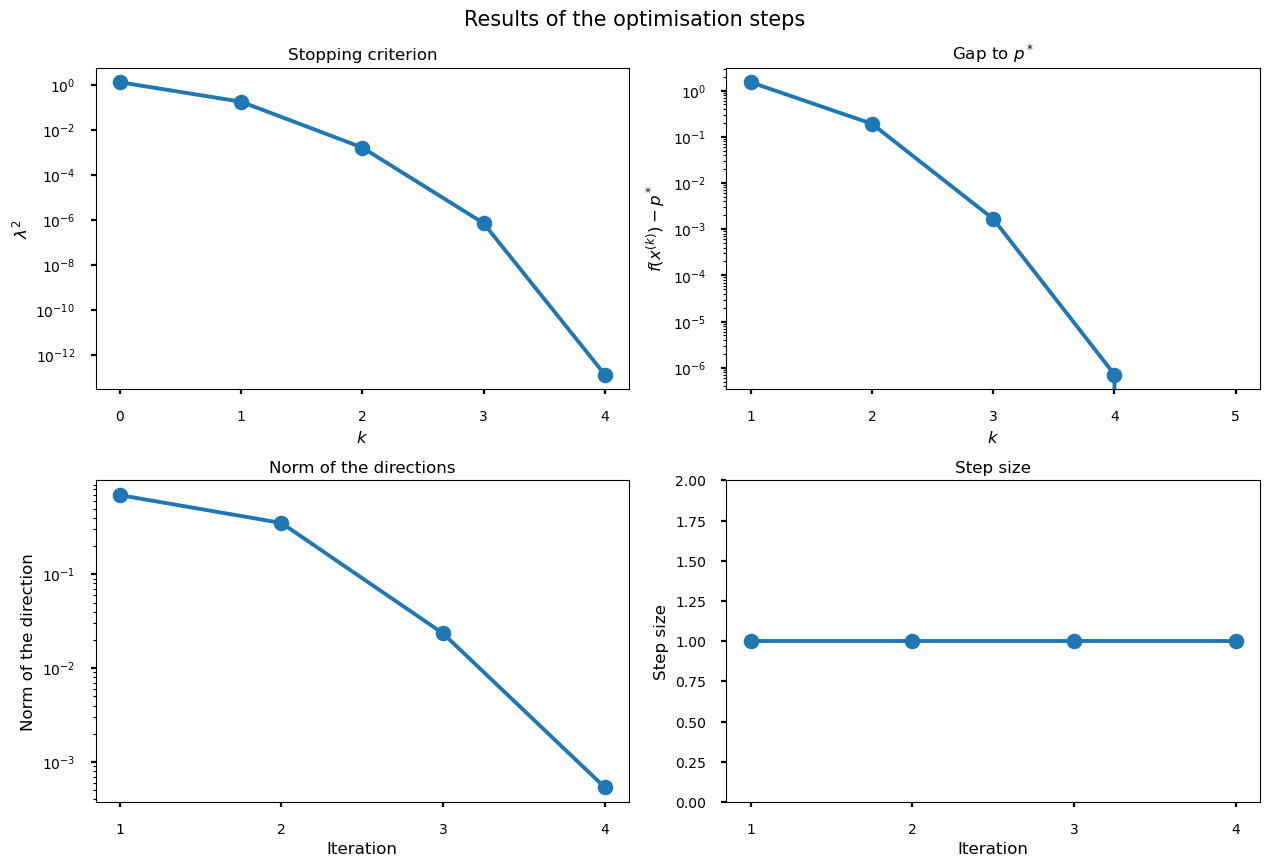

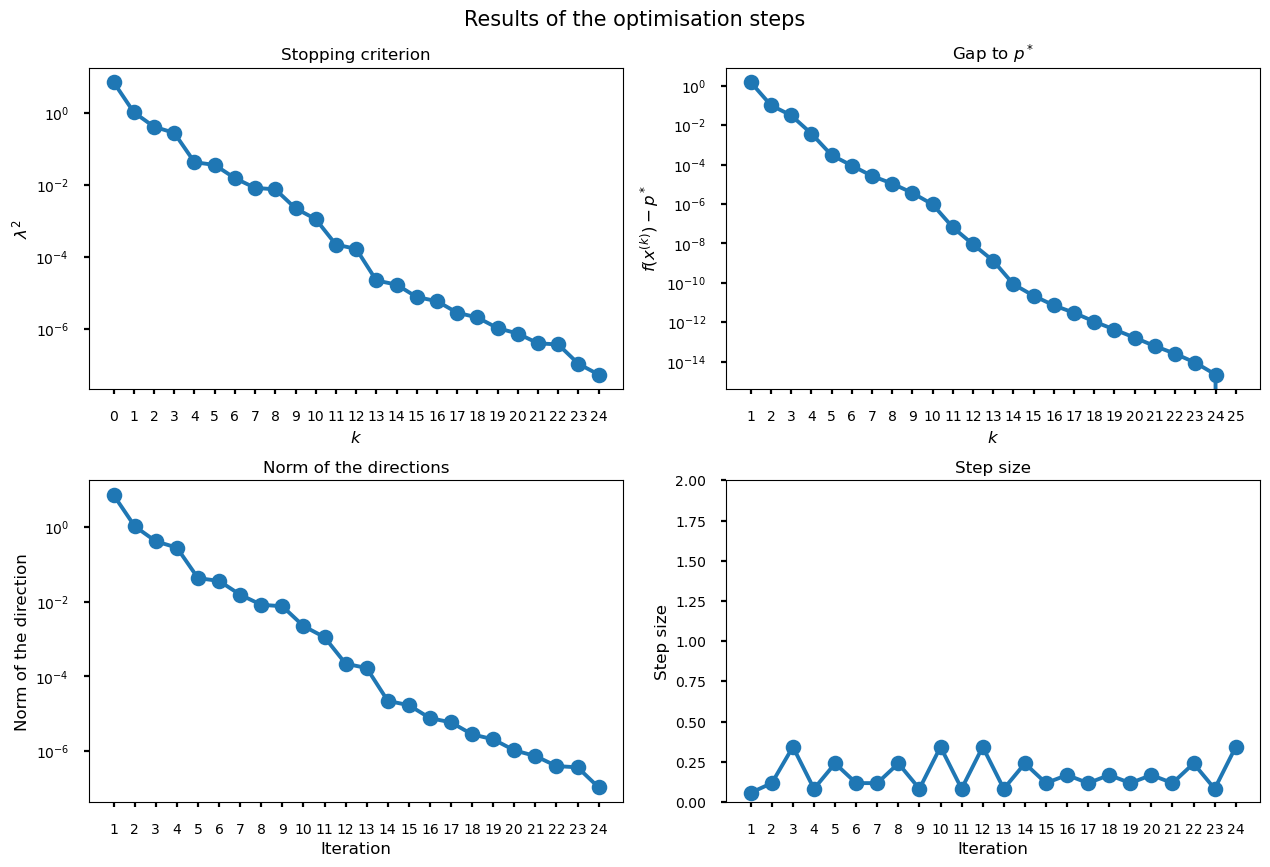

In [26]:
fignq = pbnq.plot_ouptuts()
fignq2 = pbnq2.plot_ouptuts()

In [27]:
min, max, step = -1, 1, 0.01
x, y = np.mgrid[min:max:step, min:max:step]
p = np.stack((x, y), axis=2)
z = np.array([[f(p[i, j]) for j in range(p.shape[1])] for i in range(p.shape[0])])

In [28]:
points = np.array(pbnq.xs)
points2 = np.array(pbnq2.xs)
points3 = np.array(pbnq3.xs)
points4 = np.array(pbnq4.xs)

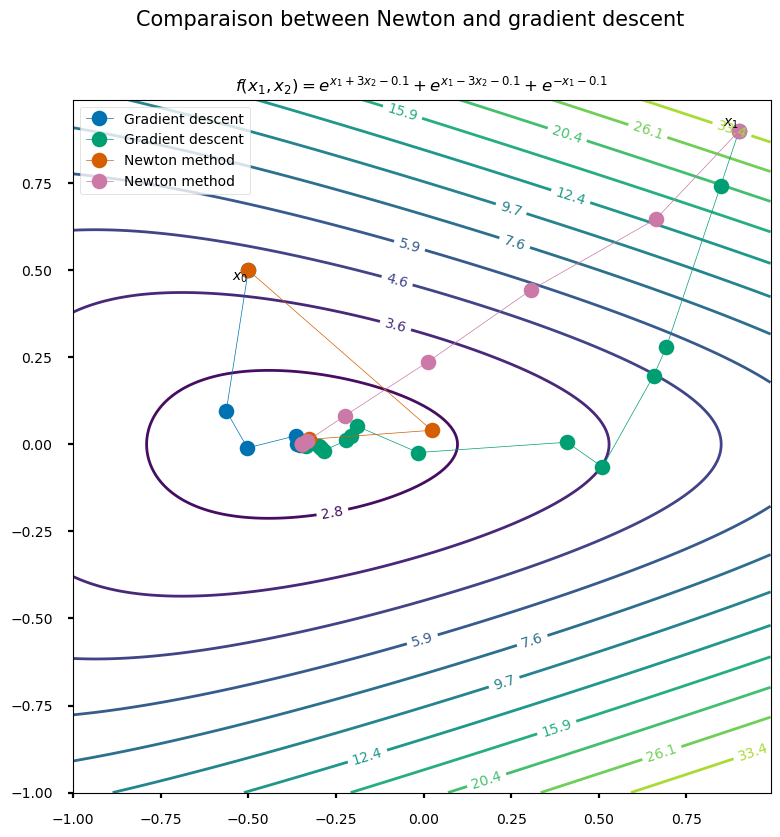

In [29]:
plt.style.use('seaborn-v0_8-colorblind')
fig, ax = plt.subplots(figsize=(9,9))
# im = ax.imshow(z,cmap=plt.cm.RdBu) # drawing the function
# adding the Contour lines with labels
min_z, max_z = np.log(1.1*np.min(z)), 0.9*np.log(np.max(z))
levels = np.exp(np.linspace(min_z, max_z, 11))
# cset = ax.contour(z, np.exp(np.linspace(min_z, max_z, 10)), linewidths=2, cmap=plt.cm.Set2)
cset = ax.contour(x, y, z, levels=levels, linewidths=2, cmap=plt.cm.viridis, norm=colors.LogNorm(vmin=z.min(), vmax=z.max()))
ax.clabel(cset, inline=True, fmt='%1.1f', fontsize=10)
# plt.colorbar(cset) # adding the colobar on the right
# latex fashion title
plt.title('$f(x_1, x_2) = e^{x_1 + 3 x_2 - 0.1} + e^{x_1 - 3 x_2 - 0.1} + e^{-x_1 - 0.1}$')
# ax.set(xticks=x[::10, 0], yticks=y[0, ::10])
plt.plot(points2[:, 0], points2[:, 1], marker='o', lw=0.5, label='Gradient descent')
plt.plot(points4[:, 0], points4[:, 1], marker='o', lw=0.5, label='Gradient descent')
plt.plot(points[:, 0], points[:, 1], marker='o', lw=0.5, label='Newton method')
plt.plot(points3[:, 0], points3[:, 1], marker='o', lw=0.5, label='Newton method')
plt.annotate('$x_0$', x0, horizontalalignment='right', verticalalignment='top')
plt.annotate('$x_1$', x1, horizontalalignment='right', verticalalignment='bottom')
fig.suptitle("Comparaison between Newton and gradient descent")
plt.legend(frameon=True)
plt.show()

## Test of the Barrier method on a quadratic function

In [5]:
from sklearn.datasets import make_regression
from src.optimisation import QuadraticBarrierMethod, LASSOProblem

In [6]:
N = 20
D = 50
M = 2*D

X, y, coefs = make_regression(
    n_samples=N,
    n_features=D,
    n_informative=int(0.8*D),
    n_targets=1,
    noise=0.2,
    coef=True,
    random_state=123
)

y /= np.std(y)

ld = 10
Q = 0.5*np.identity(N)
p = -y
A = np.vstack((X.T, -X.T))
b = ld * np.ones(M)

In [7]:
def generate_data(N=20, D=50, ld=10, sigma=5, density=0.2):
    "Generates data matrix X and observations Y."
    np.random.seed(1)
    beta_star = np.random.randn(D)
    idxs = np.random.choice(range(D), int((1-density)*D), replace=False)
    for idx in idxs:
        beta_star[idx] = 0
    X = np.random.randn(N,D)
    y = X.dot(beta_star) + np.random.normal(0, sigma, size=N)
    Q = 0.5*np.identity(N)
    p = y
    A = np.vstack((X.T, -X.T))
    b = ld * np.ones(M)
    return X, y, beta_star, Q, p, A, b

In [8]:
N = 20
D = 50
M = 2*D
X, y, beta_star, Q, p, A, b = generate_data(N=N, D=D, ld=10, sigma=0.1, density=0.2)

In [10]:
x0 = np.zeros(N)
t0 = 1
mu = 20
qp = QuadraticBarrierMethod(
    Q=Q,
    p=p,
    A=A,
    b=b,
    x0=x0,
    t0=t0,
    mu=mu,
    tol=0,
    error=1e-8,
    centering_kwargs=dict(
        alpha=0.2,
        max_iter=200,
        max_t_iter=200
    )
)

In [11]:
qp.optimise(verbose=True)

Step 1:
	 Criterion = 1.00e+02
	 y_1 = -39.5136
	 Centering step final criterion = 4.15507e-09
	 Number of steps in centering = 4
Step 2:
	 Criterion = 5.00e+00
	 y_2 = -47.8579
	 Centering step final criterion = 9.94288e-17
	 Number of steps in centering = 9
Step 3:
	 Criterion = 2.50e-01
	 y_3 = -48.2656
	 Centering step final criterion = 1.23969e-10
	 Number of steps in centering = 10
Step 4:
	 Criterion = 1.25e-02
	 y_4 = -48.285
	 Centering step final criterion = 1.08785e-13
	 Number of steps in centering = 7
Step 5:
	 Criterion = 6.25e-04
	 y_5 = -48.286
	 Centering step final criterion = 1.97568e-13
	 Number of steps in centering = 10
Step 6:
	 Criterion = 3.13e-05
	 y_6 = -48.286
	 Centering step final criterion = 2.12045e-10
	 Number of steps in centering = 5
Step 7:
	 Criterion = 1.56e-06
	 y_7 = -48.286
	 Centering step final criterion = 2.22198e-10
	 Number of steps in centering = 6

Step 8:
	 Criterion = 7.81e-08
	 y_8 = -48.286
	 Centering step final criterion = 4.49572e-

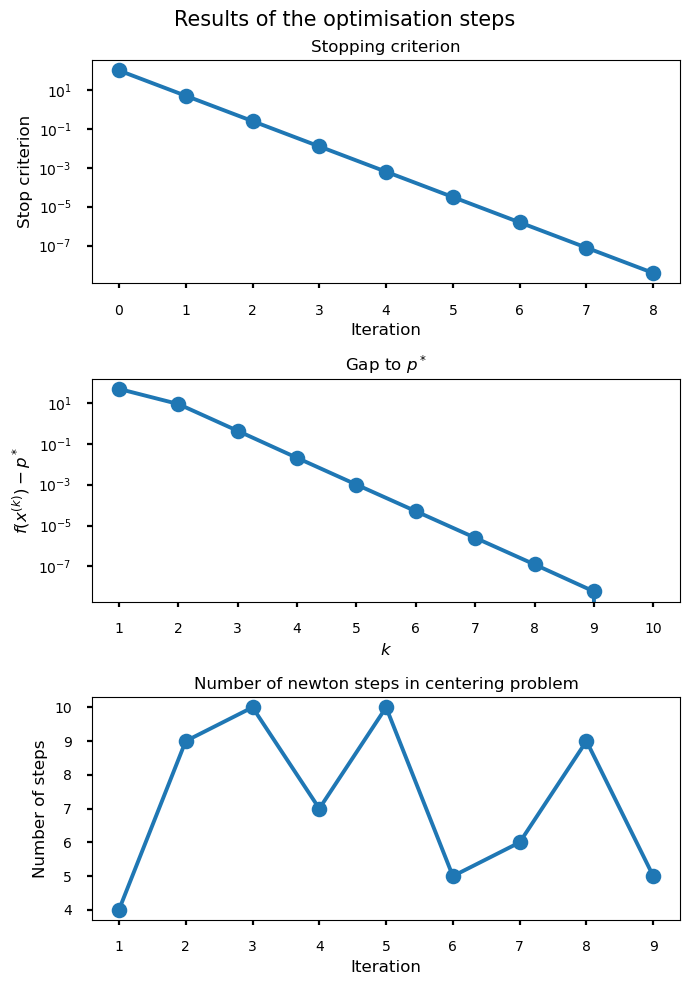

In [12]:
qpfig = qp.plot_ouptuts((7, 10))

## LASSO problem with multiple $\mu$.

In [11]:
from src.data_generator import generate_data
from src.optimisation import LASSOProblem

In [90]:
N = 100
D = 50
M = 2*D
ld = 10
X, y, beta_star, Q, p, A, b = generate_data(
    N=N, D=D, ld=ld, sigma=1, density=0.2
)

In [91]:
x0 = np.zeros(N)
t0 = 1
mu = 20

In [92]:
lasso = LASSOProblem(X, y, ld=ld)

In [93]:
lasso.cvxpy_solution()

Solving with CVXPY..
Optimal value: -129.9451


### End of the test

In [94]:
mus = [2, 5, 10, 20, 35, 50, 75, 100, 125, 150, 175, 200]

In [100]:
results = lasso.try_mus(
    mus=mus,
    x0=x0,
    t0=t0,
    error=1e-6,
    centering_kwargs=dict(
        alpha=0.2,
        beta=0.5,
        max_iter=100,
        max_t_iter=100
    ),
    verbose=False
)

100%|██████████| 12/12 [01:05<00:00,  5.47s/it, mu=200]


### Exemple of centering plot

In [102]:
lasso.pbs[2].mu, lasso.pbs[2].ts[2]

(10, 100)

In [103]:
lasso.pbs[2].center_pbs[2]

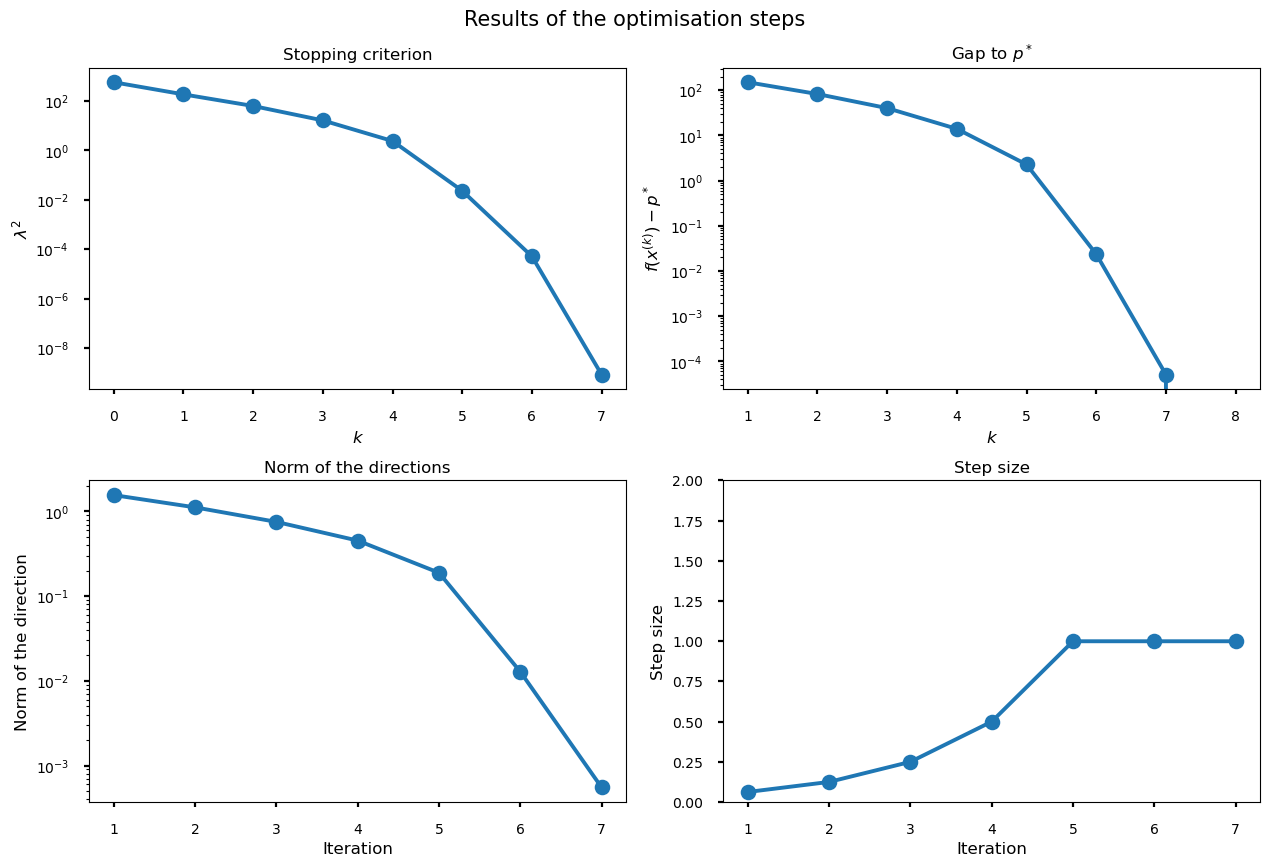

In [104]:
center_fig = lasso.pbs[2].center_pbs[2].plot_ouptuts()

### Exemple of lasso plot

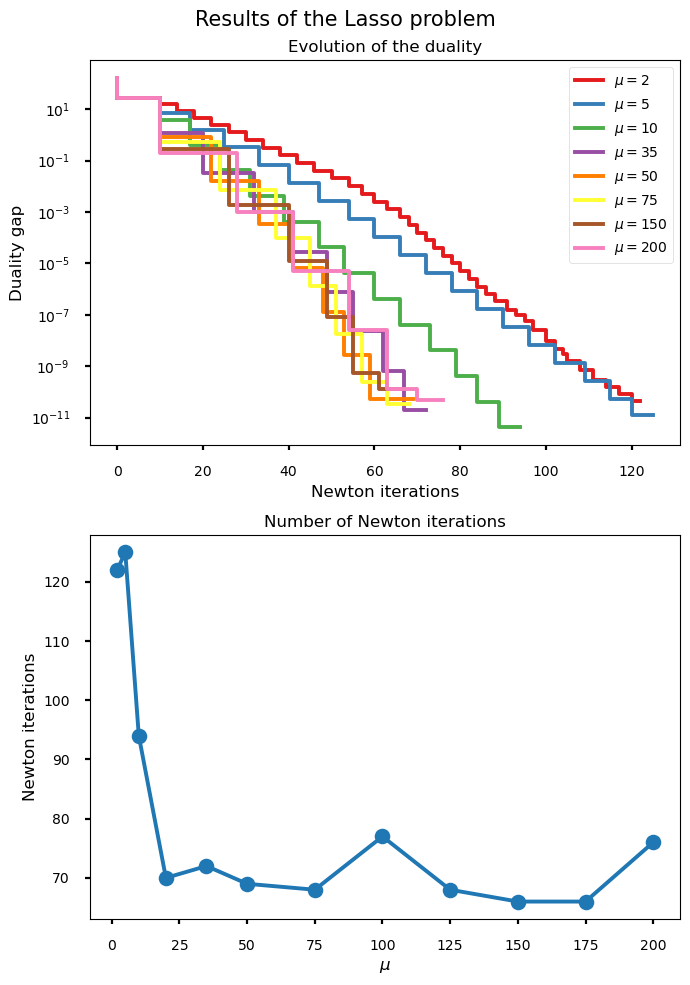

In [101]:
fig = lasso.plot_results(
    submus=[2, 5, 10,  35, 50, 75, 150, 200],
    figsize=(7, 10)
)

In [105]:
lasso.compare_with_cvxpy()

(1.0388452890824263e-10, 1.7053025658242404e-13)

In [106]:
w_star = lasso.get_w_star()

In [107]:
lasso.lasso_func(w_star)

129.94511475777747

In [108]:
w_star

array([-5.78163588e-13,  1.11842321e-02,  6.97938449e-02, -1.17354405e-13,
        2.54717129e-13,  4.44694237e-14,  1.33017607e-01, -7.77598655e-01,
        2.09992011e-01,  1.49517016e-02, -1.32148276e-01, -1.82542798e+00,
       -1.87210346e-01, -1.59906031e-01,  9.41040656e-02, -5.03686179e-13,
       -5.12316753e-02,  5.27479727e-14,  3.09761249e-13,  1.08581518e-01,
       -9.24928383e-01, -3.68038143e-02,  7.33537864e-13, -8.81488350e-03,
       -1.43425511e-12, -1.42916405e-13,  5.10936516e-02, -5.61018062e-13,
        3.43530427e-12,  2.42120198e-13, -6.85878976e-01, -2.21586588e-13,
       -1.21426491e-12,  5.50711111e-12,  2.70113579e-13, -3.80641464e-13,
       -9.74239965e-01, -2.27023447e-13, -1.34124422e-12,  4.55582230e-01,
        1.28062350e-13,  7.11797146e-02, -5.91909148e-13,  1.44966444e+00,
       -9.04850871e-12, -1.83197419e-12,  3.36717871e-13,  6.77274061e-13,
        3.49707112e-13,  7.80348008e-14])

## CVXPY on dual problem

In [78]:
import cvxpy as cp

x = cp.Variable(N)
prob = cp.Problem(cp.Minimize(cp.quad_form(x, Q) + p.T @ x),
                 [A @ x <= b])
prob.solve()

prob.value, x.value

(-44.640894550003495,
 array([ 0.73181407, -0.84530778, -0.52563881, -2.35593478, -1.00330414,
         0.71251306, -1.63990241, -0.39663129,  0.82584064, -1.04842948,
        -1.0351969 ,  0.15396756, -0.92493194, -0.54019352, -0.10492113,
         0.5674252 , -0.44287173,  0.32671034, -4.19676049, -1.57367555]))

We see that both solution are almost the same.

* The $\ell_2$-norm of the difference between the optimal points is less than $5 \times 10^{-14}$.
* The difference between the values of the function is less than $2 \times 10^{-17}$.

## CVXPY on LASSO problem

In [43]:
def loss_fn(X, Y, beta):
    return cp.norm2(X @ beta - Y)**2

def regularizer(beta):
    return cp.norm1(beta)

def objective_fn(X, Y, beta, lambd):
    return loss_fn(X, Y, beta) + lambd * regularizer(beta)

def mse(X, Y, beta):
    return (1.0 / X.shape[0]) * loss_fn(X, Y, beta).value

In [76]:
import cvxpy as cp

beta = cp.Variable(D)
lambd = cp.Parameter(nonneg=True)
problem = cp.Problem(cp.Minimize(objective_fn(X, y, beta, lambd)))

lambd_values = [ld]
train_errors = []
test_errors = []
beta_values = []
for v in lambd_values:
    lambd.value = v
    problem.solve()
    train_errors.append(mse(X, y, beta))
    beta_values.append(beta.value)

In [77]:
beta.value, problem.value

(array([-1.22170091e-01,  2.33106305e-01,  3.05069133e-12,  9.95144039e-01,
         4.30489640e-11, -1.49052417e-09,  7.70765039e-01, -3.69562834e-02,
         4.50499297e-01,  6.39145197e-11, -1.76728545e-10, -2.69659959e-10,
        -2.19494913e-10,  2.19467178e-10, -3.22221072e-10,  6.13117966e-01,
        -7.98881058e-02,  2.67996097e-11, -1.27990539e-10,  1.62517184e-10,
        -1.18188333e-10, -5.51384321e-02, -1.38765046e-10,  5.02293389e-09,
         1.69297407e-11,  8.41264900e-11,  1.00744598e-09, -3.47707951e-10,
        -1.25861671e-10,  2.78196906e-10, -1.29884686e-01,  4.31098148e-11,
         2.31807852e-11,  2.80474347e-10,  2.87306996e-10, -1.35318009e-01,
        -3.53974321e-10,  4.47161978e-11,  1.67566123e-10,  1.25711362e-08,
        -9.53288255e-10,  3.32165358e-10,  2.46366077e-10,  3.86656620e-01,
         8.09973212e-11, -7.08446043e-10,  1.82890079e-10,  6.72950570e-10,
        -9.21521839e-11,  3.69660574e-10]),
 56.89234479583571)